# Plot Results

In [1]:
# imports
import os
import pickle
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Results for PPO

In [33]:
def load_results(exp_dir):
    results = []
    # load results
    for (dirpath, dirnames, files) in os.walk(exp_dir):
        if "save.pkl" in files:
            save_path = os.path.join(dirpath, "save.pkl")
            save_dict = pickle.load(open(save_path, "rb"))
            results.append( save_dict["eps-returns"] )
    results = np.vstack(results)
    # sort in descending order
    results = -np.sort(-results, axis=1)
    return results

def plot_results(results, env_name):
    sns.set(style="darkgrid", font_scale=1.0)
    # dataframe magic; needed for seaborn
    df = pd.DataFrame(results).melt()
    df.rename(columns={"variable":"episode",
                       "value":"return"},
              inplace=True)
    sns.lineplot(x="episode", y="return", data=df)\
    .set(title=f"Returns sorted by descending order on {env_name}")
    

def plot_results_ind(results, env_name):
    x = np.arange(results.shape[1])
    num_seeds = results.shape[0]
    for i in range(num_seeds):
        y = results[i]
        fig, ax = plt.subplots(figsize=(8,5))
        # ax.bar(x, y, linewidth=0)
        ax.plot(x, y)
        ax.set_title(f'Seed{i}: Returns sorted by descending order on {env_name}')
        ax.set(xlabel="episode", ylabel="return")
    plt.show()
    
    

### Cartpole

6 seeds; 1e4 timesteps of training; Evaluated on 100 episodes after training

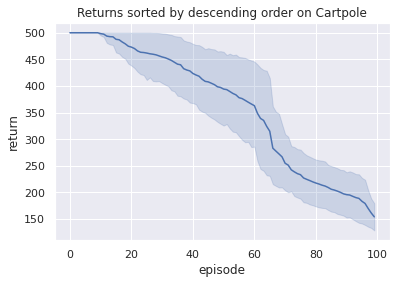

In [3]:
exp_dir = "exp_dir/ppo/cartpole/group1"
results = load_results(exp_dir)
plot_results(results, env_name="Cartpole")

6 seeds; 1e6 timesteps of training; Evaluated on 100 episodes after training

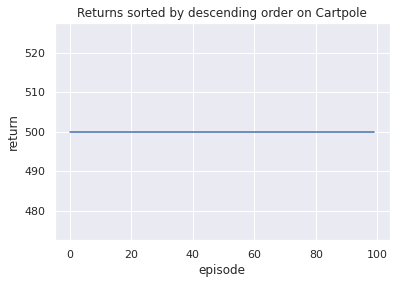

In [4]:
exp_dir = "exp_dir/ppo/cartpole/group2"
results = load_results(exp_dir)
plot_results(results, env_name="Cartpole")

### HalfCheetah

6 seeds; 2e6 timesteps of training; Evaluated on 1000 episodes after training ( no hyperparameter tuning )
Figure below plots the mean across 6 seeds. Shaded area is 95% confidence interval.

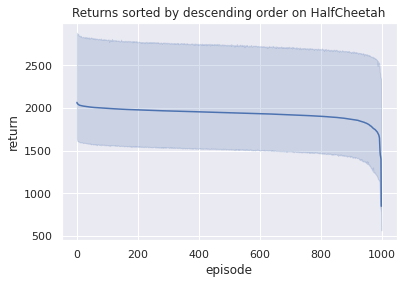

In [5]:
exp_dir = "exp_dir/ppo/halfcheetah/group1"
results = load_results(exp_dir)
plot_results(results, env_name="HalfCheetah")

#### Individual results

Plots for each seed

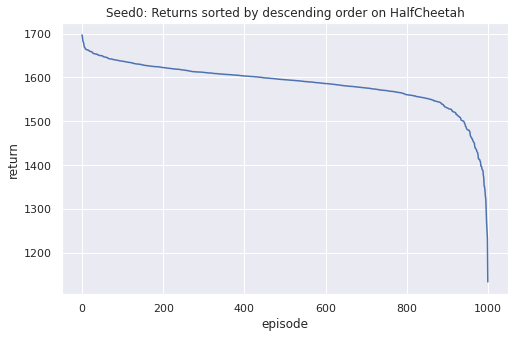

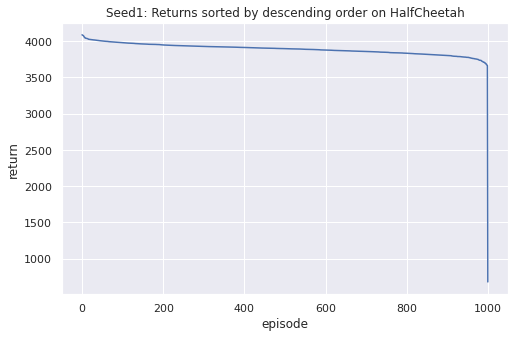

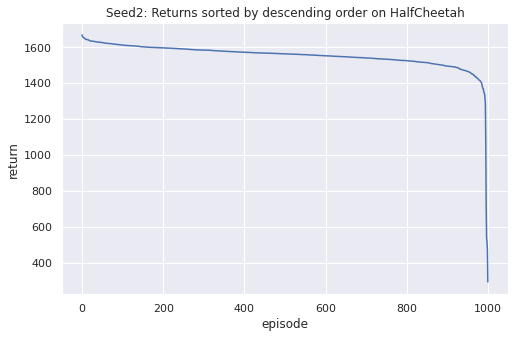

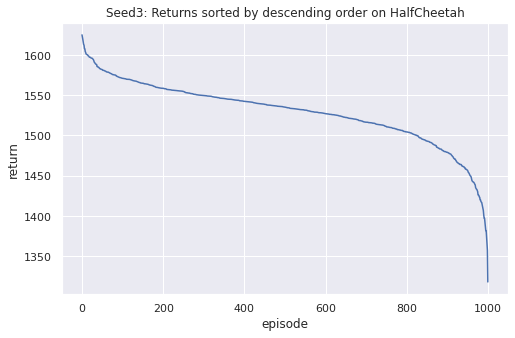

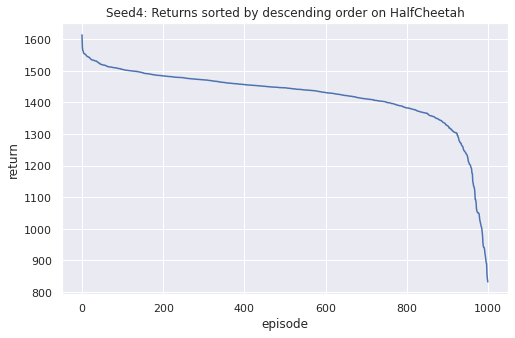

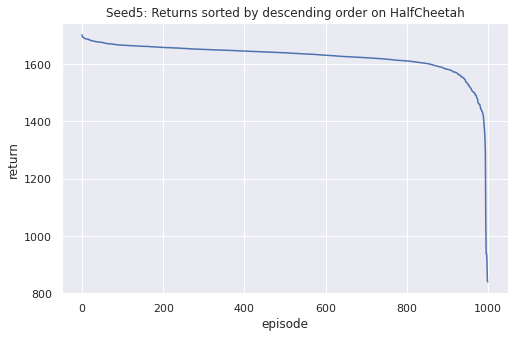

In [34]:
plot_results_ind(results, env_name="HalfCheetah")

# The End